<h2 style="color:red"> DATA SCIENCE CAPSTON-PROJECT No.02 (HEALTH CARE)</h2>

<h2 style="color:Green"> Project Task: Week 1</h2>

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import metrics

In [2]:
df=pd.read_csv(r"C:\Users\welcome\Desktop\health care diabetes.csv")
df           

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
Positive = df[df['Outcome']==1]
Positive.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [6]:
Negative = df[df['Outcome']==0]
Negative.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [7]:
df['Glucose'].value_counts().head(7)

100    17
99     17
129    14
125    14
111    14
106    14
95     13
Name: Glucose, dtype: int64

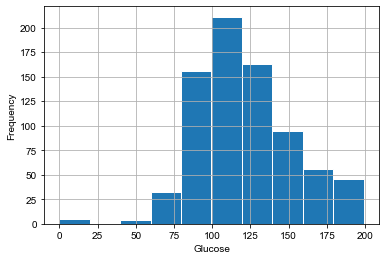

In [8]:
plt.xlabel('Glucose')
sns.set_style(style='darkgrid')
df['Glucose'].plot.hist()

In [9]:
df['BloodPressure'].value_counts().head(7)

70    57
74    52
68    45
78    45
72    44
64    43
80    40
Name: BloodPressure, dtype: int64

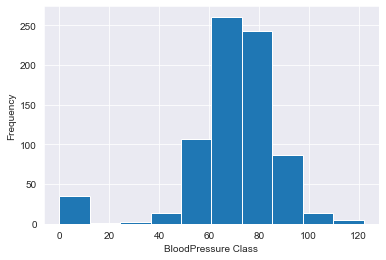

In [10]:
plt.xlabel('BloodPressure Class')
sns.set_style(style='darkgrid')
df['BloodPressure'].plot.hist()

In [11]:
df['SkinThickness'].value_counts().head(7)

0     227
32     31
30     27
27     23
23     22
33     20
18     20
Name: SkinThickness, dtype: int64

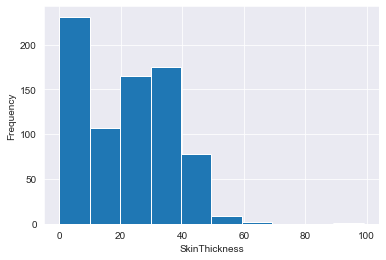

In [12]:
plt.xlabel('SkinThickness')
sns.set_style(style='darkgrid')
df['SkinThickness'].plot.hist()

In [13]:
df['Insulin'].value_counts().head(7)

0      374
105     11
140      9
130      9
120      8
100      7
94       7
Name: Insulin, dtype: int64

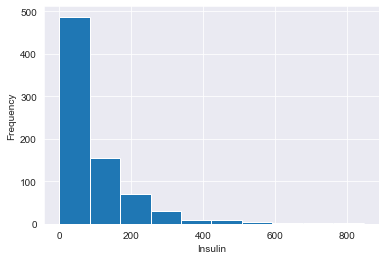

In [14]:
plt.xlabel('Insulin')
sns.set_style(style='darkgrid')
df['Insulin'].plot.hist()

In [15]:
df['BMI'].value_counts().head(7)

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
32.4    10
32.8     9
Name: BMI, dtype: int64

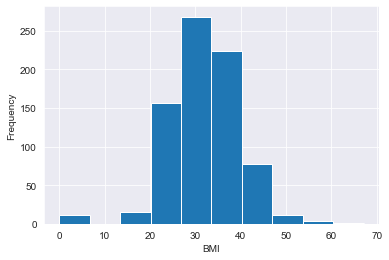

In [16]:
plt.xlabel('BMI')
sns.set_style(style='darkgrid')
df['BMI'].plot.hist()

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Insights from Descriptive Analysis

#### There is 768 observations of 9 variable. Independent variables are Pregnencies , Glucose, BloodPressure, Insulin, BMI and DiabetesPedigree Function. Age is Outcome Variable. Average Age of Patients are 33.24 with minimum being 21 and maximum 81. Avg. value of independent variables are Preg = 3.845052,Glucose = 120.894531, BP = 69.105469, ST=20.536458, Insulin = 79.799479, BMI = 31.992578 DPF = 0.471876 . 

#### Variation in variables can be easily observed from table below :

In [18]:
print("Standard Deviation of each variables are ==> ")
df.apply(np.std)

Standard Deviation of each variables are ==> 


Pregnancies                   3.367384
Glucose                      31.951796
BloodPressure                19.343202
SkinThickness                15.941829
Insulin                     115.168949
BMI                           7.879026
DiabetesPedigreeFunction      0.331113
Age                          11.752573
Outcome                       0.476641
dtype: float64

<h2 style="color:Orange">Project Task: WEEK 2</h2>

In [19]:
Positive['Glucose'].value_counts().head(7)

125    7
158    6
128    6
115    6
129    6
146    5
162    5
Name: Glucose, dtype: int64

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 28., 26., 36.,
        27., 29., 22., 24., 21., 25., 14.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 <a list of 1 Patch objects>)

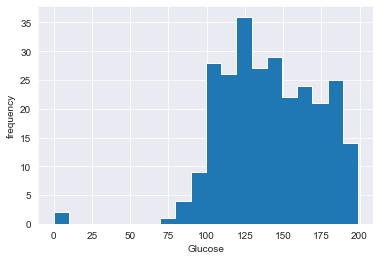

In [20]:
plt.xlabel('Glucose')
plt.ylabel('frequency')
sns.set_style(style='darkgrid')
plt.hist(Positive['Glucose'],histtype='stepfilled',bins=20)

In [21]:
Positive['BMI'].value_counts().head(7)

32.9    8
31.6    7
33.3    6
30.5    5
32.0    5
31.2    5
32.4    4
Name: BMI, dtype: int64

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  3., 13., 38., 61., 61., 36., 27.,
        14.,  7.,  3.,  1.,  1.,  0.,  1.]),
 array([ 0.   ,  3.355,  6.71 , 10.065, 13.42 , 16.775, 20.13 , 23.485,
        26.84 , 30.195, 33.55 , 36.905, 40.26 , 43.615, 46.97 , 50.325,
        53.68 , 57.035, 60.39 , 63.745, 67.1  ]),
 <a list of 1 Patch objects>)

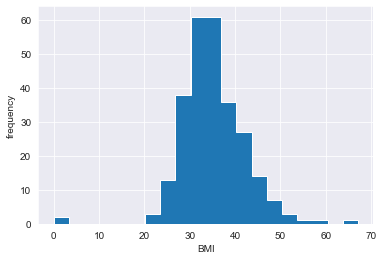

In [22]:
plt.xlabel('BMI')
plt.ylabel('frequency')
sns.set_style(style='darkgrid')
plt.hist(Positive['BMI'],histtype='stepfilled',bins=20)

In [23]:
Positive['BloodPressure'].value_counts().head(7)

70    23
76    18
78    17
74    17
72    16
0     16
82    13
Name: BloodPressure, dtype: int64

(array([16.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  6.,  6., 19., 37., 56.,
        36., 41., 31.,  7.,  4.,  4.,  3.]),
 array([  0. ,   5.7,  11.4,  17.1,  22.8,  28.5,  34.2,  39.9,  45.6,
         51.3,  57. ,  62.7,  68.4,  74.1,  79.8,  85.5,  91.2,  96.9,
        102.6, 108.3, 114. ]),
 <a list of 1 Patch objects>)

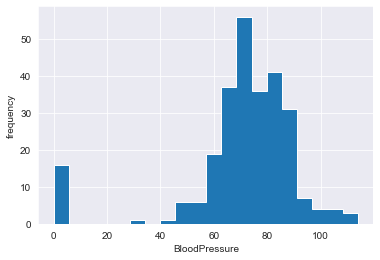

In [24]:
plt.xlabel('BloodPressure')
plt.ylabel('frequency')
sns.set_style(style='darkgrid')
plt.hist(Positive['BloodPressure'],histtype='stepfilled',bins=20)

In [25]:
Positive['SkinThickness'].value_counts().head(7)

0     88
32    14
33     9
30     9
39     8
35     8
36     8
Name: SkinThickness, dtype: int64

(array([88.,  1.,  4., 10., 18., 30., 41., 34., 23., 15.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  4.95,  9.9 , 14.85, 19.8 , 24.75, 29.7 , 34.65, 39.6 ,
        44.55, 49.5 , 54.45, 59.4 , 64.35, 69.3 , 74.25, 79.2 , 84.15,
        89.1 , 94.05, 99.  ]),
 <a list of 1 Patch objects>)

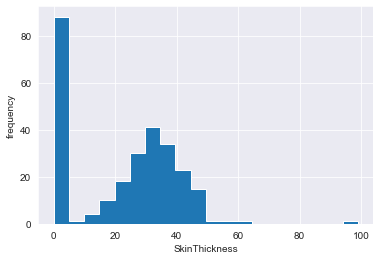

In [26]:
plt.xlabel('SkinThickness')
plt.ylabel('frequency')
sns.set_style(style='darkgrid')
plt.hist(Positive['SkinThickness'],histtype='stepfilled',bins=20)

In [27]:
Positive['Insulin'].value_counts().head(7)

0      138
130      6
180      4
156      3
175      3
194      2
125      2
Name: Insulin, dtype: int64

(array([141.,   6.,  23.,  33.,  24.,  12.,   7.,   7.,   2.,   1.,   1.,
          5.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  0. ,  42.3,  84.6, 126.9, 169.2, 211.5, 253.8, 296.1, 338.4,
        380.7, 423. , 465.3, 507.6, 549.9, 592.2, 634.5, 676.8, 719.1,
        761.4, 803.7, 846. ]),
 <a list of 1 Patch objects>)

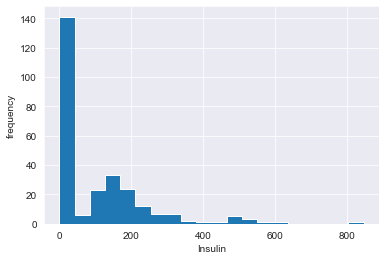

In [28]:
plt.xlabel('Insulin')
plt.ylabel('frequency')
sns.set_style(style='darkgrid')
plt.hist(Positive['Insulin'],histtype='stepfilled',bins=20)

#### Scatter plot

In [29]:
BloodPressure = Positive['BloodPressure']
Glucose = Positive['Glucose']
SkinThickness = Positive['SkinThickness']
Insulin = Positive['Insulin']
BMI = Positive['BMI']

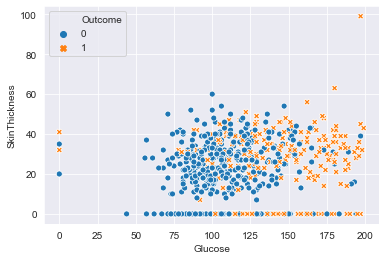

In [30]:
sns.scatterplot(data=df, x="Glucose", y="SkinThickness", hue="Outcome",style="Outcome")

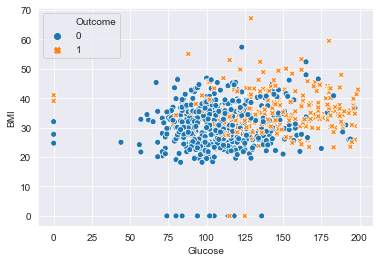

In [31]:
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Outcome",style="Outcome")

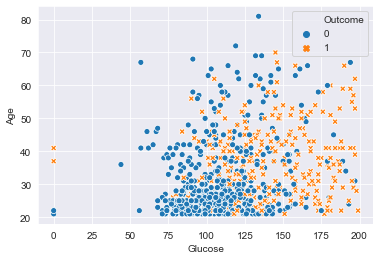

In [32]:
sns.scatterplot(data=df, x="Glucose", y="Age", hue="Outcome",style="Outcome")

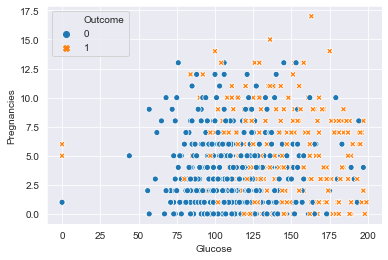

In [33]:
sns.scatterplot(data=df, x="Glucose", y="Pregnancies", hue="Outcome",style="Outcome")

Text(0.5, 1.0, 'Scatter plot between variables')

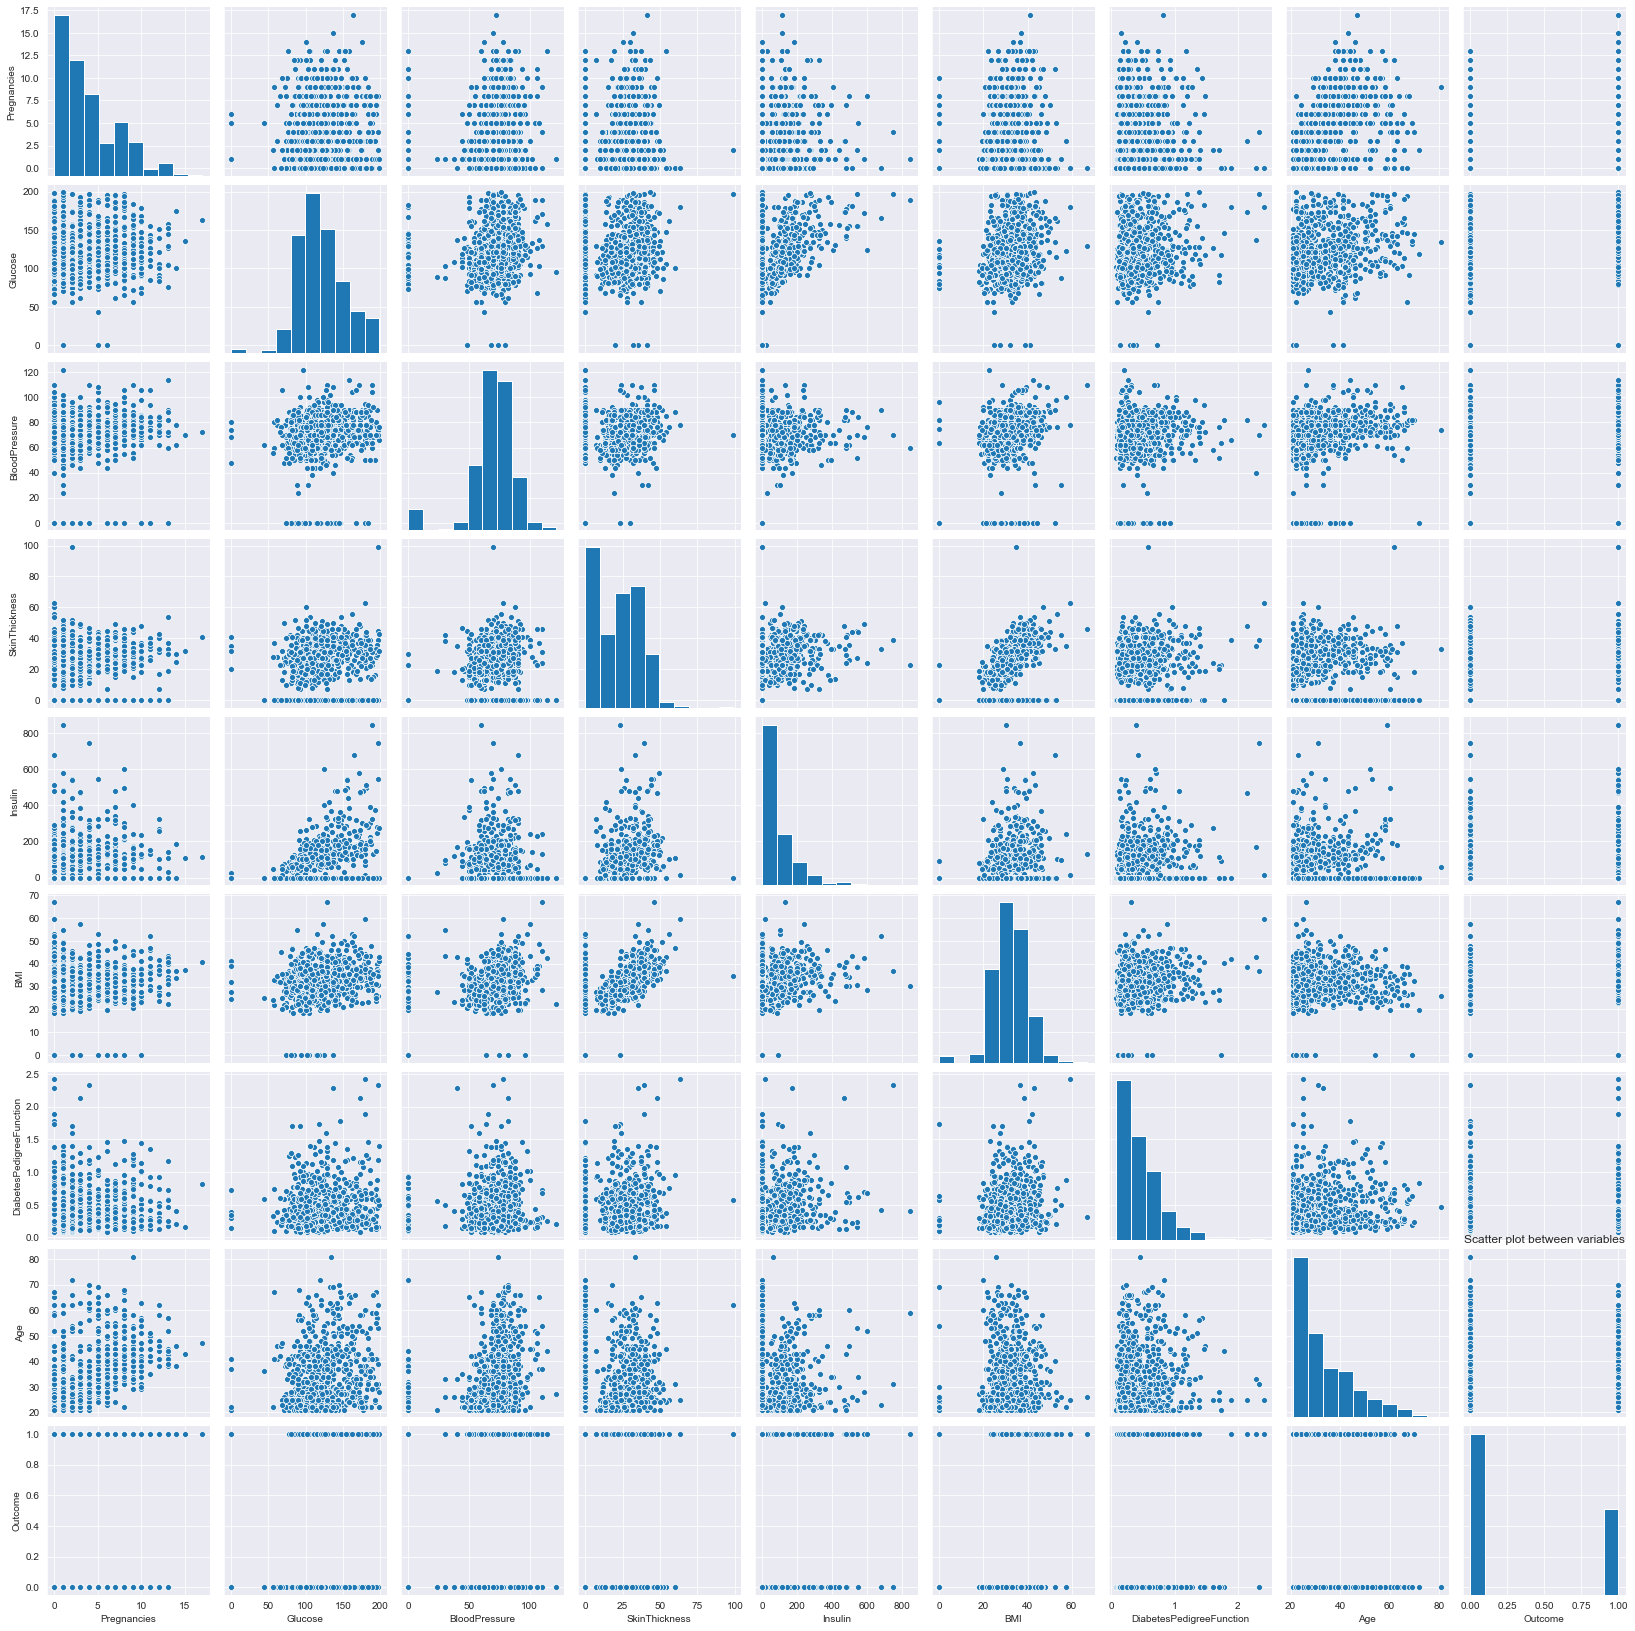

In [34]:
sns.pairplot(df)
plt.title('Scatter plot between variables')

#### We can see from scatter plot that there is no strong multicolinearity among features, but between skin thickness and BMI, Pregnancies and age it looks like there is small chance of positive correlation.

### Correlation matrix

In [35]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### We can clearly see that Glucose and BMI has good impact on outcome. There is a strong positive correlation between BMI and Skinthickness or Pregnancies and age

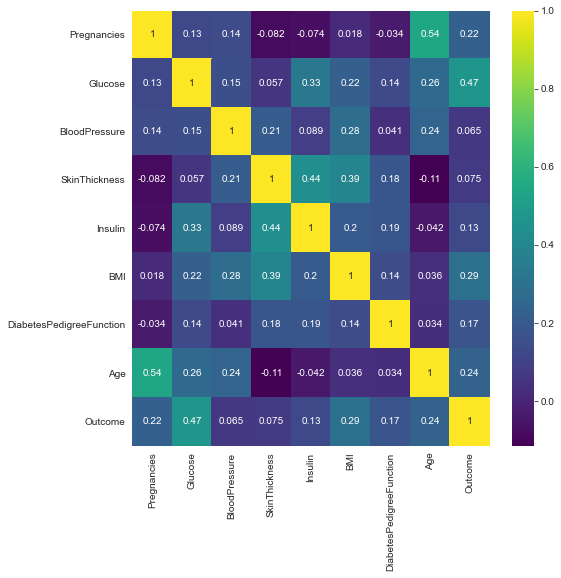

In [36]:
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')  ### gives correlation value

<h2 style="color:Brown">Project Task: WEEK 3</h2>

In [86]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [88]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
Scale=StandardScaler()
x_train_std=Scale.fit_transform(x_train)
x_test_std=Scale.transform(x_test)

In [91]:
norm=lambda a:(a-min(a))/(max(a)-min(a))

In [92]:
df_norm=df.iloc[:,:-1]

In [93]:
df_normalized=df_norm.apply(norm)

In [95]:
x_train_norm,x_test_norm,y_train_norm,y_test_norm=train_test_split(df_normalized.values,y,test_size=0.20,random_state=0)

In [96]:
print(x_train_norm.shape)
print(x_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(614, 8)
(154, 8)
(614,)
(154,)


#### Data is mostly numerical and in such scenario , Logistic Regression works fine. We have also seen in week 2 that variables are depending on target somewhat linearly, So this is also good for Logistic Regression. I will be also using Support Vector Classifier, Perceptron Learning, Random Forest (Ensemble Learning) to see if i can improve accuracy. Note these learning algorithm also works on linear data very well. To validate model i will be using train test split, for accuracy i will be using accuracy using confusion matrix because classes are balanced and i will be also considering ROC Curve and ROC AUC Score to make sure Type 2 Error will not occur for Positive class, that is 1 (HEALTH CARE)

<h2 style="color:Violet">KNN Model </h2>

#### KNN With Standard Scaling

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model.fit(x_train_std,y_train)
knn_pred=knn_model.predict(x_test_std)

Model Validation ==>

Accuracy Score of KNN Model::
0.7922077922077922

 Classification Report::
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154
 


 ROC Curve


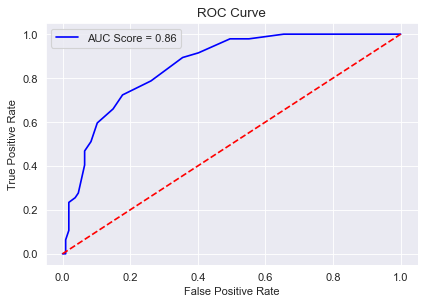

In [102]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y_test,knn_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,knn_pred),'\n')
print("\n","ROC Curve")
knn_prob=knn_model.predict_proba(x_test_std)
knn_prob1=knn_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,knn_prob1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### KNN With Normalization

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_norm = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model_norm.fit(x_train_norm,y_train_norm)
knn_pred_norm=knn_model_norm.predict(x_test_norm)

Model Validation ==>

Accuracy Score of KNN Model with Normalization::
0.7922077922077922

 Classification Report::
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.71      0.53      0.61        47

    accuracy                           0.79       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154
 


 ROC Curve


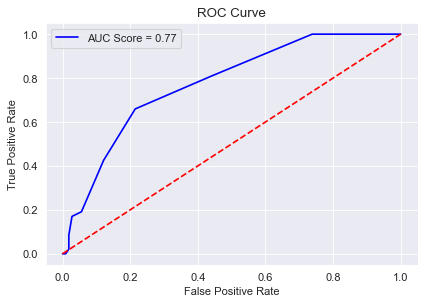

In [105]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model with Normalization::")
print(metrics.accuracy_score(y_test_norm,knn_pred_norm))
print("\n","Classification Report::")
print(metrics.classification_report(y_test_norm,knn_pred_norm),'\n')
print("\n","ROC Curve")
knn_prob_norm=knn_model.predict_proba(x_test_norm)
knn_prob_norm1=knn_prob_norm[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test_norm,knn_prob_norm1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### We can clearly see that KNN with Standardization is better than Normalization, So later i will build models using Z Score Standardization and will compare with KNN

<h2 style="color:Violet">Support Vector Classifier </h2>

In [111]:
from sklearn.svm import SVC
svc_model_linear = SVC(kernel='linear',random_state=0,probability=True,C=0.01) 
svc_model_linear.fit(x_train_std,y_train)
svc_pred=svc_model_linear.predict(x_test_std)

Accuracy Score of SVC Model with Linear Kernel::
0.8246753246753247

 Classification Report::
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       107
           1       0.78      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.81      0.76      0.78       154
weighted avg       0.82      0.82      0.82       154
 


 ROC Curve


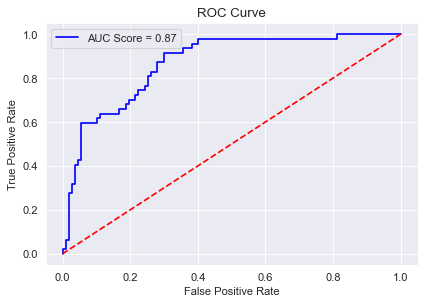

In [112]:
print("Accuracy Score of SVC Model with Linear Kernel::")
print(metrics.accuracy_score(y_test,svc_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,svc_pred),'\n')
print("\n","ROC Curve")
svc_prob_linear=svc_model_linear.predict_proba(x_test_std)
svc_prob_linear1=svc_prob_linear[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob_linear1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [113]:
from sklearn.svm import SVC
svc_model_rbf = SVC(kernel='rbf',random_state=0,probability=True,C=1) 
svc_model_rbf.fit(x_train_std,y_train)
svc_pred_rbf=svc_model_rbf.predict(x_test_std)

Model Validation ==>

Accuracy Score of SVC Model with RBF Kernel::
0.7922077922077922

 Classification Report::
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       107
           1       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154
 


 ROC Curve


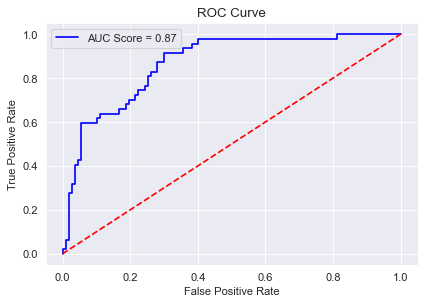

In [114]:
print("Model Validation ==>\n")
print("Accuracy Score of SVC Model with RBF Kernel::")
print(metrics.accuracy_score(y_test,svc_pred_rbf))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,svc_pred_rbf),'\n')
print("\n","ROC Curve")
svc_prob_rbf=svc_model_linear.predict_proba(x_test_std)
svc_prob_rbf1=svc_prob_rbf[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob_rbf1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

SVC with Linear Kernel is better than RBF Kernel, This was actually expected beause variables are somewhat depending linearly with outcome

#### Comparing with KNN

Both Models are working fine , but SVC Linear with C=0.01 is better in terms of AUC Score.

<h2 style="color:Blue">Project Task: WEEK 4</h2>

<h2 style="color:Violet">Logistic Regression Model</h2>

In [107]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.01) 
lr_model.fit(x_train_std,y_train)
lr_pred=lr_model.predict(x_test_std)

Model Validation ==>

Accuracy Score of Logistic Regression Model::
0.7987012987012987

 Classification Report::
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       107
           1       0.79      0.47      0.59        47

    accuracy                           0.80       154
   macro avg       0.79      0.71      0.73       154
weighted avg       0.80      0.80      0.78       154
 


 ROC Curve


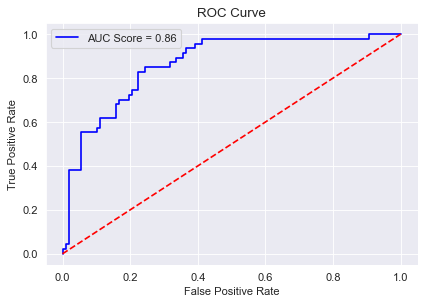

In [108]:
print("Model Validation ==>\n")
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,lr_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,lr_pred),'\n')
print("\n","ROC Curve")
lr_prob=lr_model.predict_proba(x_test_std)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

<h2 style="color:Violet">Random Forest Model</h2>

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000,random_state=0)
rf_model.fit(x_train_std,y_train)
rf_pred=rf_model.predict(x_test_std)

Accuracy Score of Logistic Regression Model::
0.8181818181818182

 Classification Report::
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       107
           1       0.72      0.66      0.69        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.82       154
 


 ROC Curve


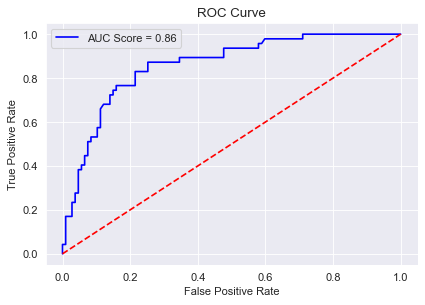

In [116]:
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,rf_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,rf_pred),'\n')
print("\n","ROC Curve")
rf_prob=rf_model.predict_proba(x_test_std)
rf_prob1=rf_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,rf_prob1)
roc_auc_rf=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### So we can see Random Forest Classifier is best among all, you might be wondering auc score is lesser by 1 than others also i am considering it to be best because balance of classes between Precision and Recall is far better than other Models. So we can consider a loss in AUC by 1

<h2 style="color:Violet">Decision Tree Model</h2>

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf_model = DecisionTreeClassifier(max_depth=5)
rf_model.fit(x_train_std,y_train)
rf_pred=rf_model.predict(x_test_std)

Model Validation ==>

Accuracy Score of Logistic Regression Model::
0.7532467532467533

 Classification Report::
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       107
           1       0.61      0.53      0.57        47

    accuracy                           0.75       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.75      0.75      0.75       154
 


 ROC Curve


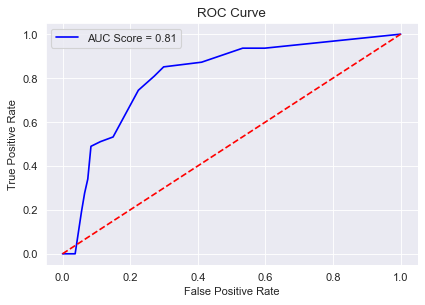

In [120]:
print("Model Validation ==>\n")
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,rf_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,rf_pred),'\n')
print("\n","ROC Curve")
rf_prob=rf_model.predict_proba(x_test_std)
rf_prob1=rf_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,rf_prob1)
roc_auc_rf=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

## THE END